## Bengaluru House Price Predictive Model

mainly House rent depends on 5 factors:
1. location
2. sqft area
3. BHK
4. number of bath
5. Neighbourhood/society

In [1]:
# Import all the neccessary  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplot inline

import warnings 
warnings.filterwarnings("ignore")

UsageError: Line magic function `%matplot` not found.


## Read the data from the csv file

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv",encoding="latin-1")
data.head()

# Replace 'latin-1' with the actual encoding of your file if it's different from UTF-8. 
# Specifying the correct encoding should help to read the file without encountering the UnicodeDecodeError.


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN


### Check the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


## Making the Dataset into correct format 

In [4]:
# availability feature overview
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [5]:
# convert the availability to datetime and extract the month 
data['Ready_not'] = pd.to_datetime(data['availability'],format="%d-%b",errors='coerce').dt.strftime('%b')

# if nan is there make it 'ready'
data['Availability'] = [r if pd.notna(r) else "ready" for r in data['Ready_not']]

In [6]:
# size feature overview
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
# I would like to remove all the charcters and keep only numbers
# usualy in India 3BHK means 3bedroom, a hall and a kitchen  
# ie, number of BHK = number of bedroom

data['Bedrooms'] = data['size'].str.extract("(\d+)").astype('Int8')


In [12]:
# keep only numbers from total_sqft variable
data['Toal_sqft'] =  data.total_sqft.str.extract("(\d+)").astype(float)

In [18]:
# In this Dataset Price is target variable, let's clean it
# all the special char in price variable
print(data.price.str.extract("([^\w\s])").value_counts())

# keep only numbers
data['Price'] = data.price.str.extract("(\d+)").astype(float)
data.Price.value_counts()

.    2522
?     202
     110
$      23
-       2
dtype: int64


65.0      333
75.0      331
55.0      321
45.0      301
60.0      300
         ... 
815.0       1
2250.0      1
369.0       1
343.0       1
488.0       1
Name: Price, Length: 485, dtype: int64

In [19]:
# How's Dataset looklike 
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Ready_not,Bedrooms,Toal_sqft,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN,Dec,2,1056.0,39.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN,ready,4,2600.0,120.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN,ready,3,1440.0,62.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN,ready,3,1521.0,95.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN,ready,2,1200.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231,NaN,NaN,NaN,NaN,ready,5,3453.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400,NaN,NaN,NaN,NaN,ready,4,3600.0,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60,NaN,NaN,NaN,NaN,ready,2,1141.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488,NaN,NaN,NaN,NaN,Jun,4,4689.0,488.0


## Data cleaning


In [26]:
# total dataset shape is
print("total dataset shape is", data.shape)

# check the null values
data.isna().agg(["mean","sum"]) 


total dataset shape is (13320, 17)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Ready_not,Bedrooms,Toal_sqft,Price
mean,0.0,0.0,0.000075,0.001201,0.413063,0.0,0.00548,0.045721,0.0,1.0,1.0,1.0,1.0,0.0,0.001201,0.0,0.0
sum,0.0,0.0,1.000000,16.000000,5502.000000,0.0,73.00000,609.000000,0.0,13320.0,13320.0,13320.0,13320.0,0.0,16.000000,0.0,0.0


In [115]:
# drop the null values 
print("before shape",data.shape)
data.drop(['Unnamed: 12','Unnamed: 11', "Unnamed: 10","Unnamed: 9"],axis=1, inplace=True)
print("after shape",data.shape)

before shape (13320, 15)
after shape (13320, 11)


In [8]:
# data shape before the data
print("before the cleaning the duplicates",data.shape)
print("\n",data[data.duplicated()].count())
print("--"*39)

# removing duplicate values
data_wo_duplicates = data.drop_duplicates(keep="last")
print("data shape after duplicates removal", data_wo_duplicates.shape)


before the cleaning the duplicates (13320, 9)

 area_type       511
availability    511
location        511
size            511
society         344
total_sqft      511
bath            511
balcony         507
price           511
dtype: int64
------------------------------------------------------------------------------
data shape after duplicates removal (12809, 9)


## filling the missing values

In [9]:
data_wo_duplicates.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5335
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [10]:
# In the location variable only one value is


# sns.countplot(data_wo_duplicates.location);
data_wo_duplicates.loc[data.location.isna()]


# lets drop the location

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86


In [11]:
# in total 5335 missing value that counts more than 40%

# sns.countplot(data_wo_duplicates.society);
data_wo_duplicates.society.value_counts()
# data is messy

GrrvaGr    69
PrarePa    63
Sryalan    56
Prtates    54
GMown E    54
           ..
RKhipwn     1
MaaveDu     1
Soisy D     1
K tlete     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


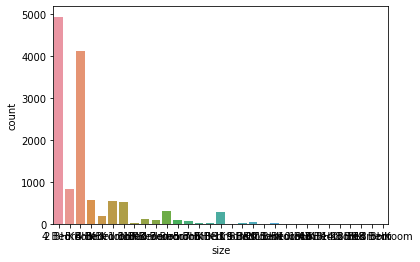

In [12]:

sns.countplot(data_wo_duplicates['size']);
# data_wo_duplicates['size'].value_counts()


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


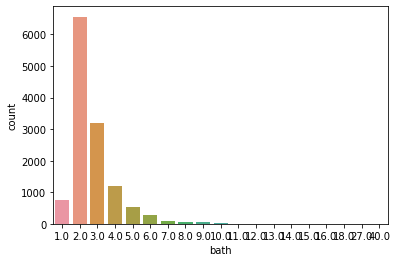

In [13]:

sns.countplot(data_wo_duplicates.bath);
# data.bath.value_counts()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


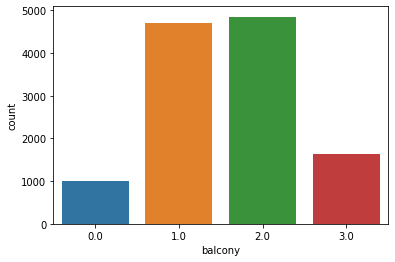

In [14]:
# 605 missing values
sns.countplot(data_wo_duplicates.balcony);

## Analysis: 1

In order to handle the missing values, I'll do first.

Sensitivity Analysis: Assess the sensitivity of your model to missing values in the location variable. 
This can involve running the analysis with and without the location variable or comparing the performance of different imputation methods. 
Sensitivity analysis helps evaluate the impact of missingness on your predictions and identify the best approach.mmm

In [15]:
data_w_sa = data_wo_duplicates.drop(['society'],axis=1)
data_w_sa.dropna(axis=0, inplace=True)

In [16]:
# data shape before and after nan drop
data_wo_duplicates.shape, data_w_sa.shape

((12809, 9), (12203, 8))

## Analysis 2:
#### Imputing the missing values using machine learning

## Outliers Treatment

Before Outliers treatment data must be treated num to numerical and cat to categorical format propoerly

In [17]:
data_w_sa

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,$51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488


<AxesSubplot:>

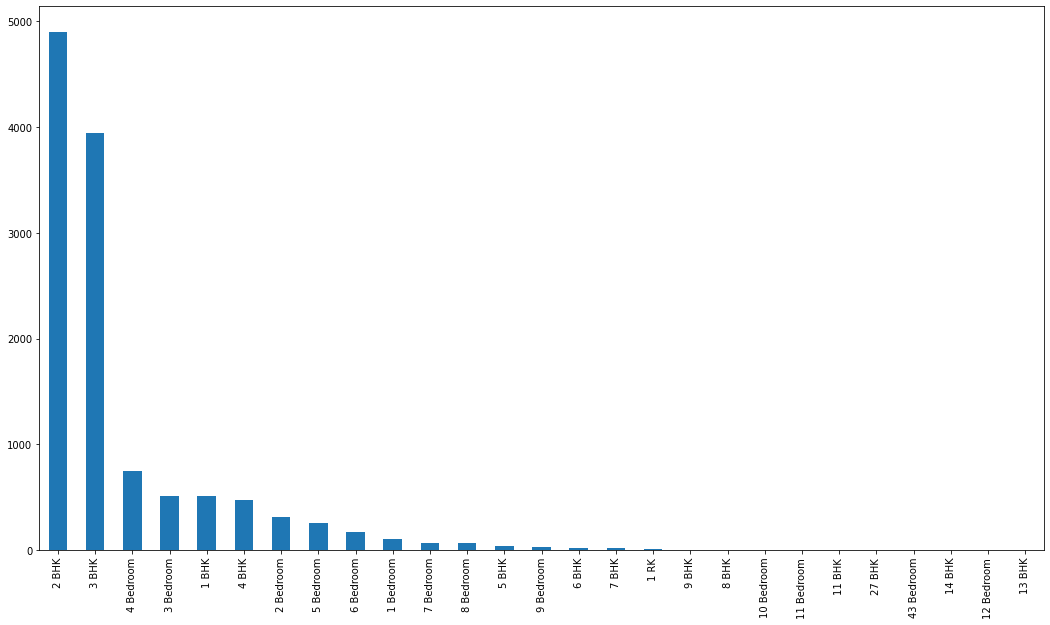

In [18]:
plt.figure(figsize=(18,10))
data_w_sa['size'].value_counts().plot(kind='bar')

In [19]:
# Extract 'bhk' and 'bedroom' into separate columns
# df['bhk'] = df['property'].str.extract('(\d+)\s*BHK')
# df['bedroom'] = df['property'].str.extract('(\d+)\s*bedroom')

In [20]:
# data_w_sa['bhk'] = data_w_sa['size'].str.extract("(\d+)\s*BHK")

In [21]:
# data_w_sa

In [22]:

# # Convert the strings to datetime objects (ignore errors for non-date values)
# date_objects = pd.to_datetime(dates, format='%y-%b', errors='coerce')

# # Replace 'Immediate Possession' and 'Ready To Move' with a custom string
# dates_cleaned = [date if pd.notnull(date) else 'Possession/Move' for date in date_objects]

# # Extract the month-year combination
# month_year = pd.to_datetime(dates_cleaned, errors='coerce').dt.to_period('M')

# # Create bins based on the month-year combination
# bins = pd.Categorical(month_year, ordered=True)

# # Create a DataFrame with the original dates and the corresponding bins
# df = pd.DataFrame({'Date': dates, 'Month Bin': bins})

# # Display the DataFrame
# print(df)

KeyError: 'bhk'

In [ ]:
data_w_sa.location.nunique()

1265

In [ ]:
data_w_sa.total_sqft.value_counts()

1200            754
1100            207
1500            196
2400            177
600             170
               ... 
3131              1
3356              1
396               1
117Sq. Yards      1
4689              1
Name: total_sqft, Length: 1976, dtype: int64

In [ ]:
data_w_sa.bath.value_counts()

2.0     6487
3.0     3043
4.0     1080
1.0      762
5.0      427
6.0      242
7.0       82
8.0       42
9.0       26
10.0       6
27.0       1
11.0       1
12.0       1
40.0       1
15.0       1
13.0       1
Name: bath, dtype: int64

In [ ]:
data_w_sa.balcony.value_counts()

2.0    4850
1.0    4712
3.0    1631
0.0    1010
Name: balcony, dtype: int64

In [ ]:
data_w_sa.price.unique()

array([' $39.07 ', ' $120.00 ', ' $62.00 ', ..., '40.14', '231', '488'],
      dtype=object)

In [ ]:
# filter the price prices which donot have the special chararcter
data_w_sa.price.filter(regex='-',)

Series([], Name: price, dtype: object)